<a href="https://colab.research.google.com/github/Niranjani-K/Hate-Speech-Detection/blob/main/HateSpeechDetection_C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hate Speech Detection

In [1]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [16]:
# import the required libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.stem.porter import *
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

Importing numpy and pandas for data operations

Re z regular expression (or RE) specifies a set of strings that matches it;

seaborns and matplotlib to visualize the data


.. last various evaluation matrices to calculate the evaluation matrices for our project


In [4]:
#importing the dataset
url = "/content/final_dataset_after_preprocessing.csv"
dataset = pd.read_csv(url)
dataset.head()

,text,hate_speech_score
0,yes indeed sort reminds elder lady played part...,0
1,trans women reading tweet right beautiful,0
2,question broads criticize america country flee...,0
3,time illegals go back country origin keep free...,0
4,starters bend one pink kick ass pussy get tast...,1


In [5]:
#convert the text column in dataset to string type from object type
dataset['text'] = dataset['text'].astype(str)

#drop all the duplicates from the dataset
dataset = dataset.drop_duplicates('text')

#form classification models for the given range of dataset 
dataset = dataset[0:40000]

#get dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 40255
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               40000 non-null  object
 1   hate_speech_score  40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 937.5+ KB


## Preprocessing of the text 

In [7]:
## 1. Removal of punctuation and capitlization
## 2. Tokenizing
## 3. Removal of stopwords
## 4. Stemming
def data_preprocessing(comment):
  comment = comment.lower()
  comment = re.sub(r"https\S+|www\S+http\S+", '', comment, flags = re.MULTILINE)
  comment = re.sub(r'\@w+|\#','', comment)
  comment = re.sub(r'[^\w\s]','',comment)
  comment = re.sub(r'ð','',comment)
  comment_tokens = word_tokenize(comment)
  filtered_comments = [w for w in comment_tokens if not w in stop_words]
  return " ".join(filtered_comments)

dataset.text = dataset['text'].apply(data_preprocessing) 

In [8]:
lemmatizer = WordNetLemmatizer()
def lemmatizing(data):
    comment = [lemmatizer.lemmatize(word) for word in data]
    return data

In [9]:
dataset['text'] = dataset['text'].apply(lambda x: lemmatizing(x))

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 40255
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               40000 non-null  object
 1   hate_speech_score  40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 937.5+ KB


## Visualisations 

In [11]:
dataset['hate_speech_score'].value_counts()

0    29647
1    10353
Name: hate_speech_score, dtype: int64

<Axes: xlabel='hate_speech_score', ylabel='count'>

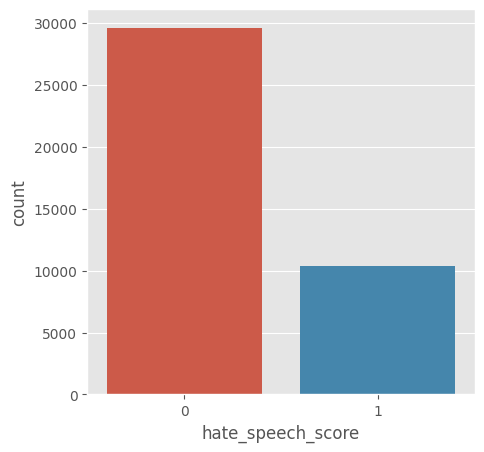

In [12]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='hate_speech_score', data = dataset)

Text(0.5, 1.0, 'Distribution of sentiments')

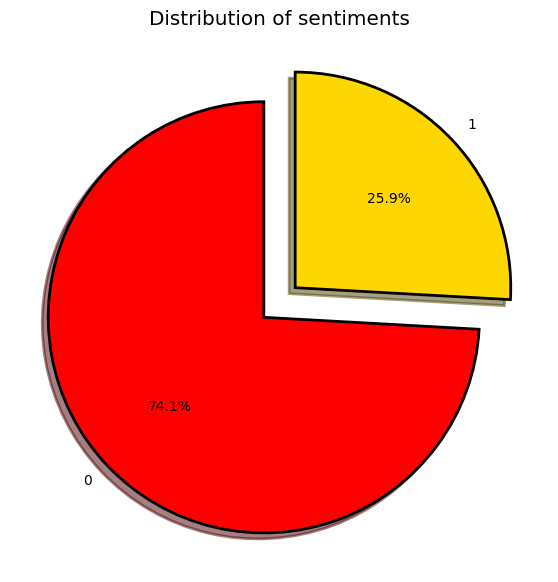

In [13]:
fig = plt.figure(figsize=(7,7))
colors = ("red", "gold")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = dataset['hate_speech_score'].value_counts()
explode = (0.1, 0.1)
tags.plot(kind='pie',autopct = '%1.1f%%', shadow=True, colors = colors, startangle =90, 
         wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [14]:
non_hate_tweets = dataset[dataset.hate_speech_score == 0]
hate_tweets = dataset[dataset.hate_speech_score == 1]

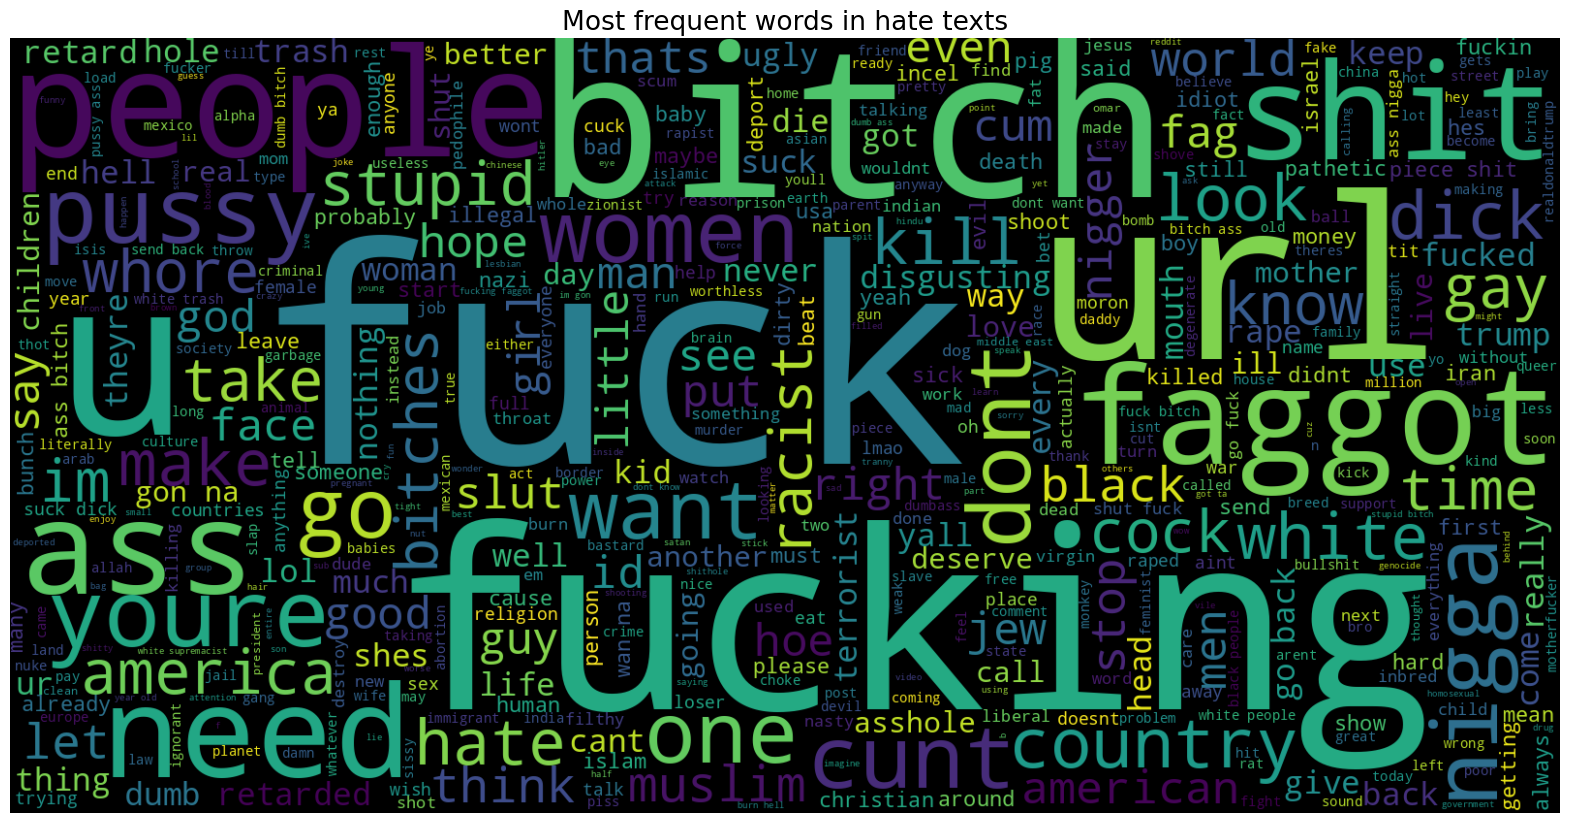

In [15]:
text = ' '.join([word for word in hate_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in hate texts', fontsize = 19)
plt.show()

## Feature Engineering

In [17]:
vect = TfidfVectorizer(ngram_range=(1,2)).fit(dataset['text'])

In [18]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features: \n{}".format(feature_names[:20]))

Number of features: 419957

First 20 features: 
['aa' 'aa anyone' 'aa burmese' 'aa jata' 'aa needs' 'aa suck' 'aa yaynay'
 'aaaaah' 'aaaaah beautiful' 'aaaaay' 'aaaaay ginger' 'aaaahhhhhhh'
 'aaaahhhhhhh proudly' 'aaaand' 'aaaand come' 'aabahaawas'
 'aabahaawas yxng' 'aaccording' 'aaccording quran' 'aadhaar']


In [19]:
vect = TfidfVectorizer(ngram_range=(1,3)).fit(dataset['text'])

In [20]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features: \n{}".format(feature_names[:20]))

Number of features: 876677

First 20 features: 
['aa' 'aa anyone' 'aa anyone attend' 'aa burmese' 'aa burmese brutal'
 'aa jata' 'aa jata hai' 'aa needs' 'aa needs loose' 'aa suck'
 'aa suck small' 'aa yaynay' 'aa yaynay like' 'aaaaah' 'aaaaah beautiful'
 'aaaaah beautiful im' 'aaaaay' 'aaaaay ginger' 'aaaaay ginger arab'
 'aaaahhhhhhh']


## Running the Models


In [21]:
X = dataset['text']
Y = dataset['hate_speech_score']
X = vect.transform(X)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [23]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train: (32000, 876677)
Size of y_train: (32000,)
Size of x_test:  (8000, 876677)
Size of y_test:  (8000,)


### K-Nearest Neighbour

In [26]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_predicts = knn.predict(x_test)
knn_acc=accuracy_score(y_test,knn_predicts)

print("Test accuarcy: {:.2f}%".format(knn_acc*100))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, knn_predicts))

Test accuarcy: 76.45%
Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      5944
           1       0.56      0.40      0.46      2056

    accuracy                           0.76      8000
   macro avg       0.68      0.64      0.66      8000
weighted avg       0.75      0.76      0.75      8000



### Logistic Regression

In [24]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_predict = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_predict, y_test)

print("Test accuarcy: {:.2f}%".format(logreg_acc*100))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, logreg_predict))

Test accuarcy: 79.06%
Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      5944
           1       0.75      0.28      0.41      2056

    accuracy                           0.79      8000
   macro avg       0.77      0.62      0.64      8000
weighted avg       0.78      0.79      0.75      8000



### Random forest

In [ ]:
model = RandomForestClassifier(n_jobs=-1,random_state=123)
model.fit(x_train, y_train)
y_train_hat = model.predict(x_train)
rf_predicts = model.predict(x_test)

rf_acc = accuracy_score(rf_predicts, y_test)
print("Test accuarcy: {:.2f}%".format(rf_acc*100))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, rf_predicts))


### Support Vector Machine

In [25]:
support =LinearSVC(random_state=20)
support.fit(x_train,y_train)
svm_predicts = support.predict(x_test)
svm_acc=accuracy_score(y_test,svm_predicts)

print("Test accuarcy: {:.2f}%".format(svm_acc*100))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, svm_predicts))


Test accuarcy: 80.60%
Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      5944
           1       0.73      0.39      0.51      2056

    accuracy                           0.81      8000
   macro avg       0.77      0.67      0.69      8000
weighted avg       0.80      0.81      0.78      8000



## Comparison of accuracy of all four models

In [ ]:
objects = ('KNN', 'Logistic', 'RandomForest','SVM')
y_pos = np.arange(len(objects))
performance = [knn_acc,logreg_acc,rf_acc,svm_acc]
plt.bar(y_pos, performance, align='center', alpha=0.6)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision')
plt.show()